### Dataset presentation

For this assignment I picked as a transcription factor to analyse Fra-1(also called FOSL1), which is part of a bigger transcription factor complex: AP-1. The dataset was publised on NCBI together with a paper which investigated the role of AP-1 transcription factor in a specific type of cancer: triple-negative breast cancer. To do so, they looked at two parts of AP-1: Fra-1 and c-Jun.
They did a CHIP-seq on BT549 cell line with chip antibody Fra-1, a CHIP-seq on BT549 cell line with chip antibody c-Jun and one for the input.
For this assignment we are using the CHIP-seq results from Fra-1 and also the input to confirm our findings.

They observed that overexpression of Fra-1 together with c-Jun can be used as a potential disease pronogstic.

Paper citation:
Genome-wide Profiling of AP-1–Regulated Transcription Provides Insights into the Invasiveness of Triple-Negative Breast Cancer
Chunyan Zhao, Yichun Qiao, Philip Jonsson, Jian Wang, Li Xu, Pegah Rouhi, Indranil Sinha, Yihai Cao, Cecilia Williams and Karin Dahlman-Wright

DOI: 10.1158/0008-5472.CAN-13-3396 Published July 2014
https://cancerres.aacrjournals.org/content/74/14/3983

Dataset:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE46166


#### Dataset download

In [2]:
#Chromatin immunoprecipitation on anti-Fra-1 antibodies
fastq-dump -O /mnt/storage/r0776676/jupyternotebooks/Assignment2StanciuMariaAlexandra/dataset SRR830487

Read 45993508 spots for SRR830487
Written 45993508 spots for SRR830487


In [2]:
#check few lines
head dataset/SRR830487.fastq

@SRR830487.1 HISEQ2:200:D1GT1ACXX:7:1101:1173:2096 length=37
CTTTTATTTTCCTGGGGTAATTACATGGGGGTGGAAT
+SRR830487.1 HISEQ2:200:D1GT1ACXX:7:1101:1173:2096 length=37
BBCFFDFFHHHFHGJIJJIHIIHJHHIIJJJ@GHDGG
@SRR830487.2 HISEQ2:200:D1GT1ACXX:7:1101:1242:2114 length=37
CTGAATTATCCAACCACTCCTCATTTAGAATTTCATA
+SRR830487.2 HISEQ2:200:D1GT1ACXX:7:1101:1242:2114 length=37
@CCFFFFEHHFHHJIJJIJJIJGHJJIJJIIIJIFGE
@SRR830487.3 HISEQ2:200:D1GT1ACXX:7:1101:1332:2121 length=37
AGCATACTGATTCCCAAGAGGTTTCCTATCCACCACA


In [12]:
#chromatin immunoprecipitation input sequencing
fastq-dump -O /mnt/storage/r0776676/jupyternotebooks/Assignment2StanciuMariaAlexandra/dataset SRR830490

Read 57560186 spots for SRR830490
Written 57560186 spots for SRR830490


In [13]:
#check few lines
head dataset/SRR830490.fastq

@SRR830490.1 HISEQ2:200:D1GT1ACXX:7:1101:1224:2138 length=37
CCCTGTGGTTGAGCCATGATTGCATCACTTCACTCCA
+SRR830490.1 HISEQ2:200:D1GT1ACXX:7:1101:1224:2138 length=37
@@@FFFDFFGHBFGHIIIIEHHC:C?ECCH>@3?*:C
@SRR830490.2 HISEQ2:200:D1GT1ACXX:7:1101:1234:2232 length=37
GACCATCAGGTCAGGAGGTCAAGACCAGCCTGGCCAA
+SRR830490.2 HISEQ2:200:D1GT1ACXX:7:1101:1234:2232 length=37
?=8DDD>ACF?FAGBEEGD93<<AEC9;;EC?DC)B?
@SRR830490.3 HISEQ2:200:D1GT1ACXX:7:1101:1345:2096 length=37
CTCTGCCTCCCGGGTTCAAGCAATTCTCCTGCCTCAG


### Check read quality 
 FastQC provides a fast overview about the quality of the raw sequence data

In [101]:
fastqc SRR830487.fastq

Started analysis of SRR830487.fastq
Approx 5% complete for SRR830487.fastq
Approx 10% complete for SRR830487.fastq
Approx 15% complete for SRR830487.fastq
Approx 20% complete for SRR830487.fastq
Approx 25% complete for SRR830487.fastq
Approx 30% complete for SRR830487.fastq
Approx 35% complete for SRR830487.fastq
Approx 40% complete for SRR830487.fastq
Approx 45% complete for SRR830487.fastq
Approx 50% complete for SRR830487.fastq
Approx 55% complete for SRR830487.fastq
Approx 60% complete for SRR830487.fastq
Approx 65% complete for SRR830487.fastq
Approx 70% complete for SRR830487.fastq
Approx 75% complete for SRR830487.fastq
Approx 80% complete for SRR830487.fastq
Approx 85% complete for SRR830487.fastq
Approx 90% complete for SRR830487.fastq
Approx 95% complete for SRR830487.fastq
Analysis complete for SRR830487.fastq


The results from qc are looking good and we can move further with the analysis.
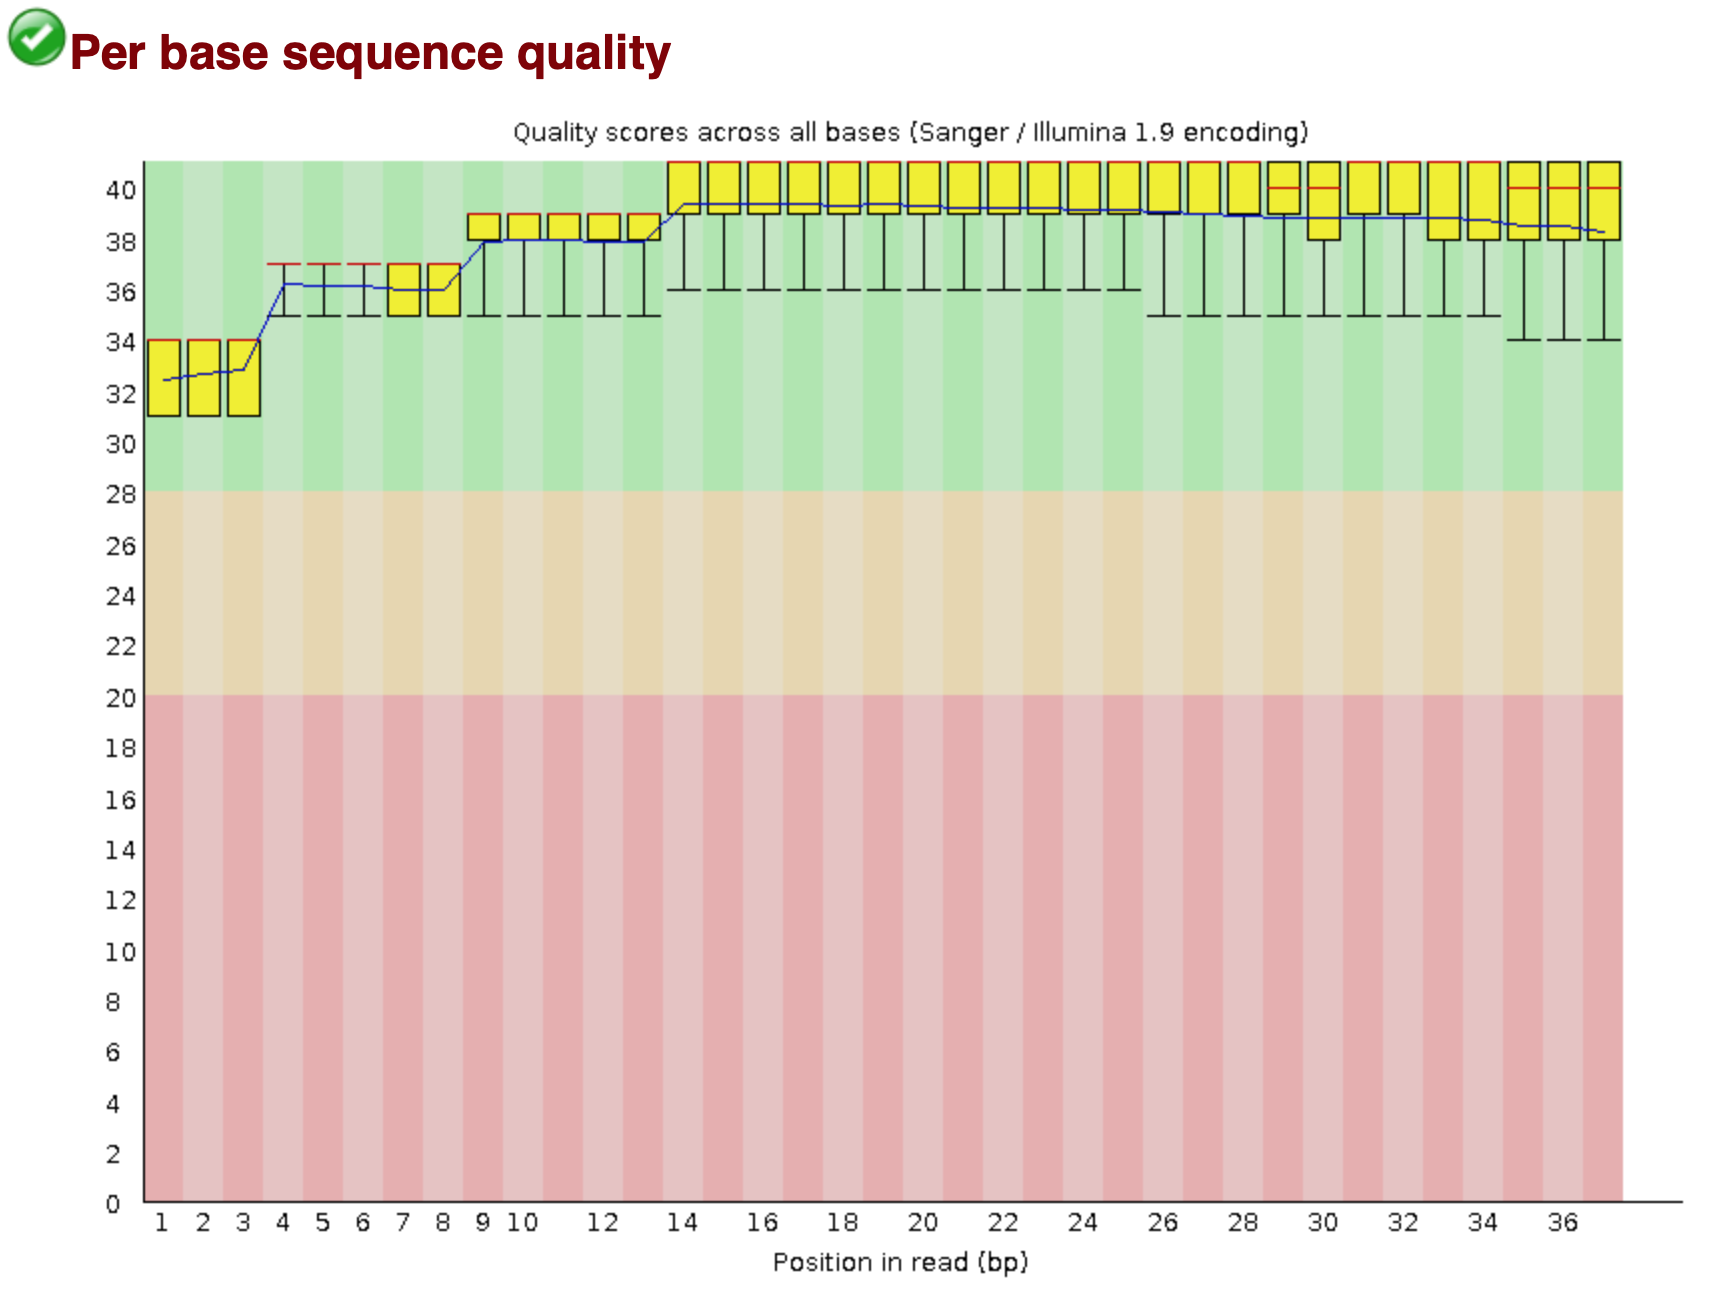

In [20]:
#rename files for easy reading
cd dataset
cp SRR830487.fastq Fra1_ChIPSeq.fastq
cp SRR830490.fastq Input.fastq
rm SRR830487.fastq
rm SRR830490.fastq

### Alignment of CHIP-seq reads

In [21]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 Fra1_ChIPSeq.fastq -S Fra1_ChIPSeq.sam

45993508 reads; of these:
  45993508 (100.00%) were unpaired; of these:
    783046 (1.70%) aligned 0 times
    33558582 (72.96%) aligned exactly 1 time
    11651880 (25.33%) aligned >1 times
98.30% overall alignment rate


In [23]:
#check the sam file
head -500 Fra1_ChIPSeq.sam | tail -5

SRR830487.410	0	chr2	169393579	42	37M	*	0	0	CCACATGGGCTTTGTTATTACTCAACAACAAAGGAAA	CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830487.411	16	chrX	146316168	40	37M	*	0	0	CCCAAAACACAAGGAAAATGAAGAACCCCCCCCCCCA	BBACCC<33>CC@DDEDC@CC@2@7CCCCCCFFFCCC	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:36C0	YT:Z:UU
SRR830487.412	16	chr17	64474404	31	37M	*	0	0	CTCTTGTTGCCCAGACTGGAGTGCAGTGGCACAATCG	JJJJJJJJJJJJJIHJJJJJJJJJHHHHHFFFFFCCC	AS:i:0	XS:i:-5	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830487.413	0	chr9	128298467	42	37M	*	0	0	AATAGTTGACTGCAATGCCACTATCTTCAACGTGCTG	@@CFFDFFHHHGGIJIJJJIIIGJIJJJJJIIHIIJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830487.414	0	chr17	36286648	1	37M	*	0	0	TCAGAACCTGCAAGGGCCTTGGGGCTGTCAAGTGGGG	CCCFFFFFHHGHGJJJJJJJJJIJJJJHIIJJIJJJJ	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU


In [24]:
#convert sam file into bam file
samtools view -S -b Fra1_ChIPSeq.sam > Fra1_ChIPSeq.bam

In [26]:
#mapped reads
samtools view -c -F 260 Fra1_ChIPSeq.bam

45210462


In the bam file there are 45993508 reads out if which 45210462 are mapped.

#### Prepare data for IGV vizualization

In [27]:
#sort bam file
samtools sort -O bam -o Fra1_ChIPSeq.sorted.bam Fra1_ChIPSeq.bam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [28]:
#create index
samtools index Fra1_ChIPSeq.sorted.bam

In [29]:
#check to see creation of the files
ls

Fra1_ChIPSeq.bam    Fra1_ChIPSeq.sorted.bam      Input_fastqc.zip
Fra1_ChIPSeq.fastq  Fra1_ChIPSeq.sorted.bam.bai  SRR830487_fastqc.zip
Fra1_ChIPSeq.sam    Input.fastq


#### Control data alignment 

In [30]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 Input.fastq -S Input.sam

57560186 reads; of these:
  57560186 (100.00%) were unpaired; of these:
    670583 (1.17%) aligned 0 times
    36829152 (63.98%) aligned exactly 1 time
    20060451 (34.85%) aligned >1 times
98.83% overall alignment rate


In [31]:
#check the sam file
head -500 Input.sam | tail -5

SRR830490.410	16	chr12	51601662	42	37M	*	0	0	CCCAGATGGTGGAACAGCCTGCCCTGTGCAGTGAGGA	JJJJJJJJJJJJJIJJJJJJJJJJHHHHHFFFFFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830490.411	16	chr16	20950874	1	37M	*	0	0	CAGTGAGCCGAGATCGCGCCACTGCACTCCAGTCTGG	IJJIJJJIJJIIJJJIIIGGFJIJHFHHHFFFFDCCC	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830490.412	16	chr14	98349606	42	37M	*	0	0	CCGACTGTCAGCTTAAACCAATCTGAAAGCTATGCCT	IJJJIJJJIJJJJJJIHJJJJHJJHHHHHFFFFFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830490.413	16	chrX	134128074	1	37M	*	0	0	ATTAGTAGAGACGGGGTTTCACCATGTTGGCCAGGCT	IIHJJHGJGIIJJJJJJIHHFJIGHHHHHFFFFFCC@	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU
SRR830490.414	0	chrX	45370586	42	37M	*	0	0	TGCTTCTAGGAGGGCAACTGGGGTTCCCTTGCATATG	CCCFFFFFHHHHHJJJJJJJJJIGHJJJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:37	YT:Z:UU


In [32]:
#convert sam file into bam file
samtools view -S -b Input.sam > Input.bam

#### Prepare data for IGV visualization

In [33]:
#sort bam file
samtools sort -O bam -o Input.sorted.bam Input.bam

[bam_sort_core] merging from 13 files and 1 in-memory blocks...


In [38]:
#create index
samtools index Input.sorted.bam

Next step is to look at a target gene of Fra-1 in IGV to determine the existance of a peak. The target gene is CSRNP1, a protein coding gene regulated by both Fra-1 and c-JUN transcription factors. IGV shows a nice, clear peak in this region.
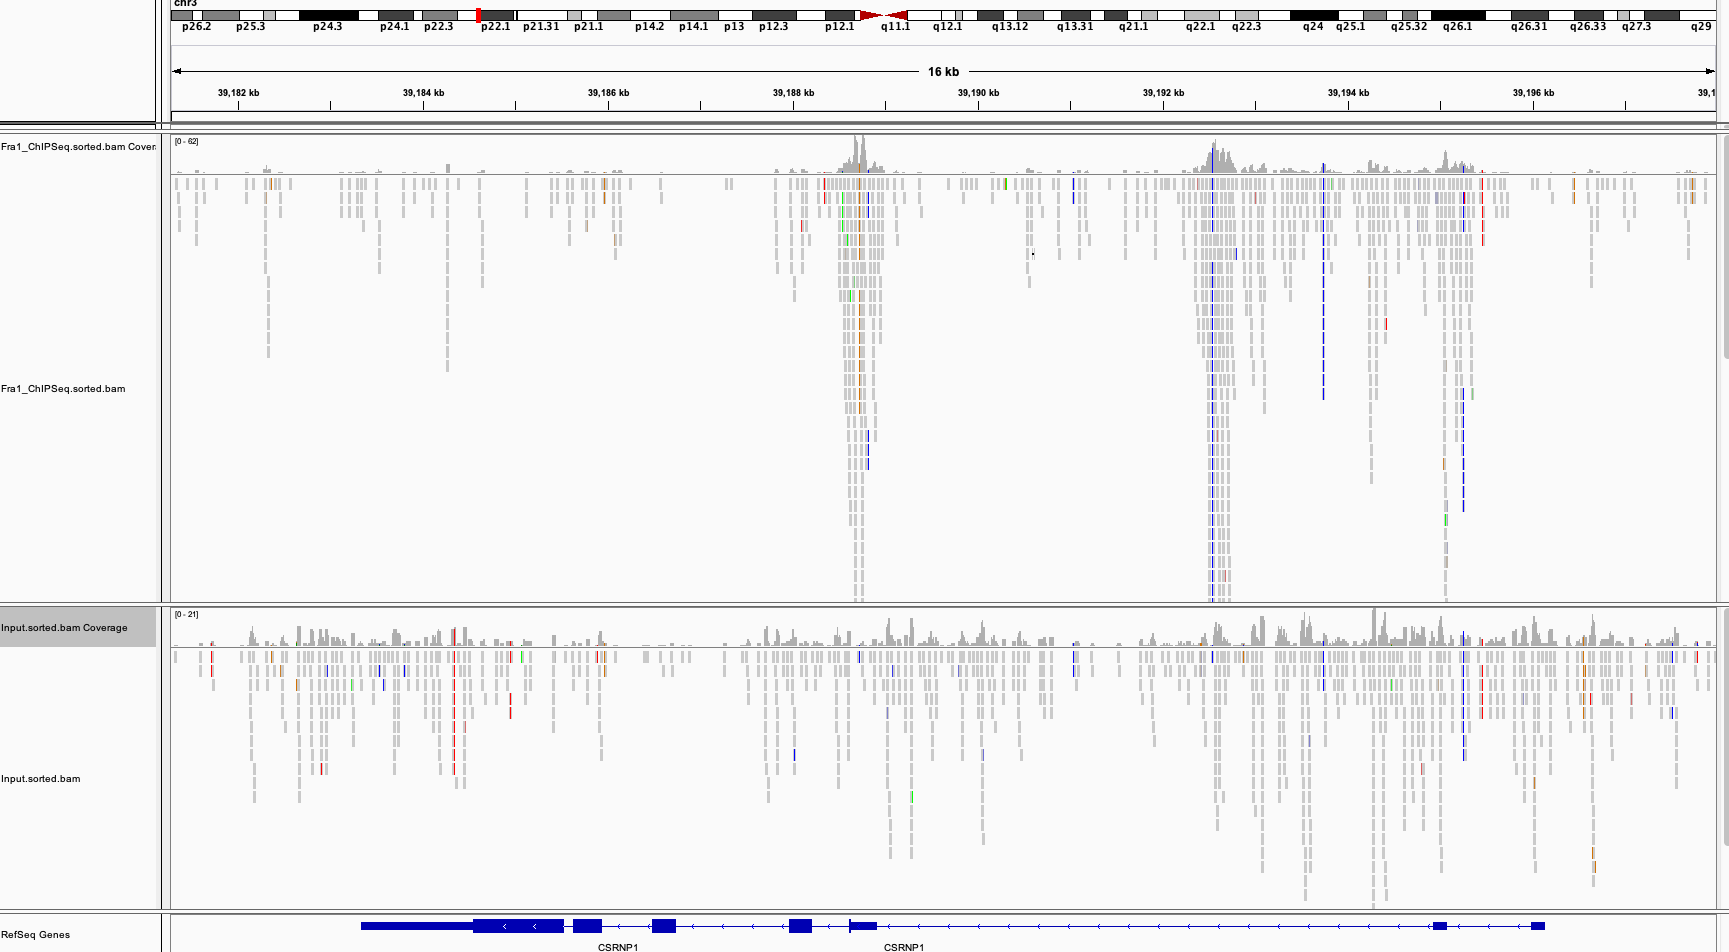

### Genome-wide coverage plots

In [35]:
bamCoverage -b Fra1_ChIPSeq.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2864785220 -o Fra1_ChIPSeq.bw

normalization: 1x (effective genome size 2864785220)
bamFilesList: ['Fra1_ChIPSeq.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


The effective genome size used was GRCh37 = 2864785220 , as per information taken from dataset publication (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1125261) and deeptools documetation (https://deeptools.readthedocs.io/en/develop/content/feature/effectiveGenomeSize.html)

IGV visualization for Fra1_ChIPSeq.bw:

We can add the output of bigWig in IGV to see how the identified peak looks.
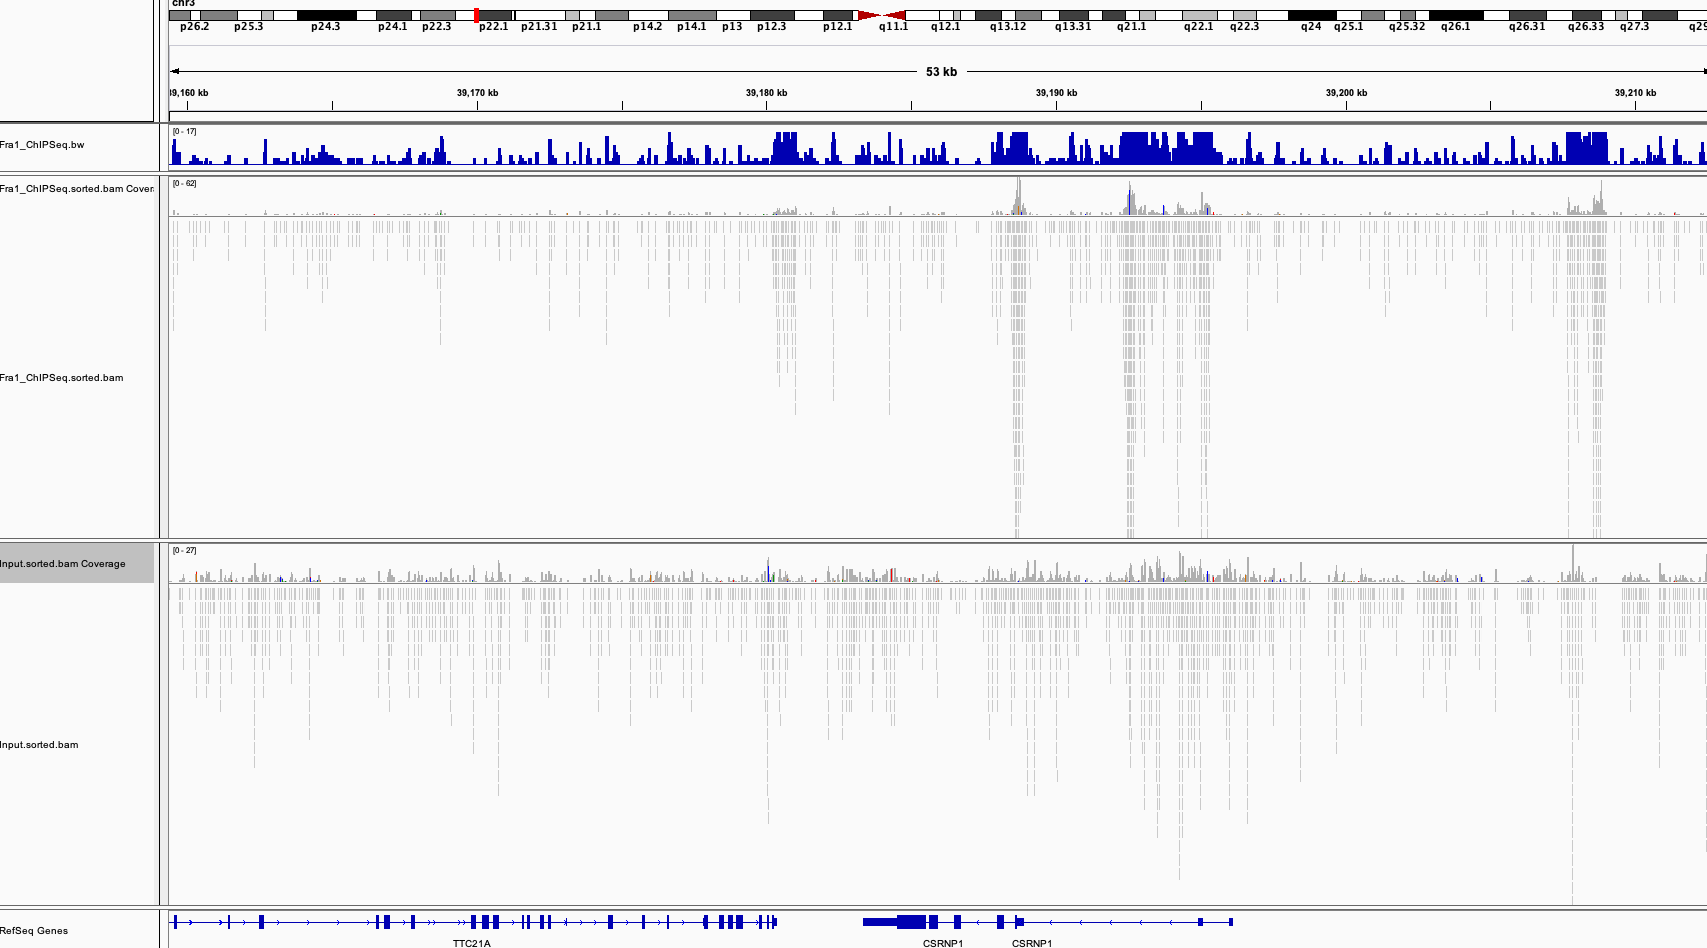

### Peak calling
Under this section we try to determine peaks based on enriched reads. The tools used is MACS2 and it will generate a list of peaks that are significant for a specified threshold. There are two important aspects on this analysis. 
The threshold set through -q command which can influence greatly the resulted peaks and the input file which is an false positive elimination.

In [36]:
macs2 callpeak -t Fra1_ChIPSeq.sorted.bam -c Input.sorted.bam -n Fra_1_08 -g 2864785220 -q 0.8

INFO  @ Sat, 05 Dec 2020 20:44:40: 
# Command line: callpeak -t Fra1_ChIPSeq.sorted.bam -c Input.sorted.bam -n Fra-1 -g 2864785220 -q 0.5
# ARGUMENTS LIST:
# name = Fra-1
# format = AUTO
# ChIP-seq file = ['Fra1_ChIPSeq.sorted.bam']
# control file = ['Input.sorted.bam']
# effective genome size = 2.86e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-01
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Sat, 05 Dec 2020 20:44:40: #1 read tag files... 
INFO  @ Sat, 05 Dec 2020 20:44:40: #1 read treatment tags... 
INFO  @ Sat, 05 Dec 2020 20:44:40: Detected format is: BAM 
INFO  @ Sat, 05 Dec 2020 20:44:40: * Input file is gzipped. 
INFO  @ Sat, 05 Dec 2020 20:44:42:  100

In [39]:
#check the identified peaks
cat Fra-1_peaks.narrowPeak | wc -l

53350


Check Fra-1_peaks.narrowPeak in IGV:
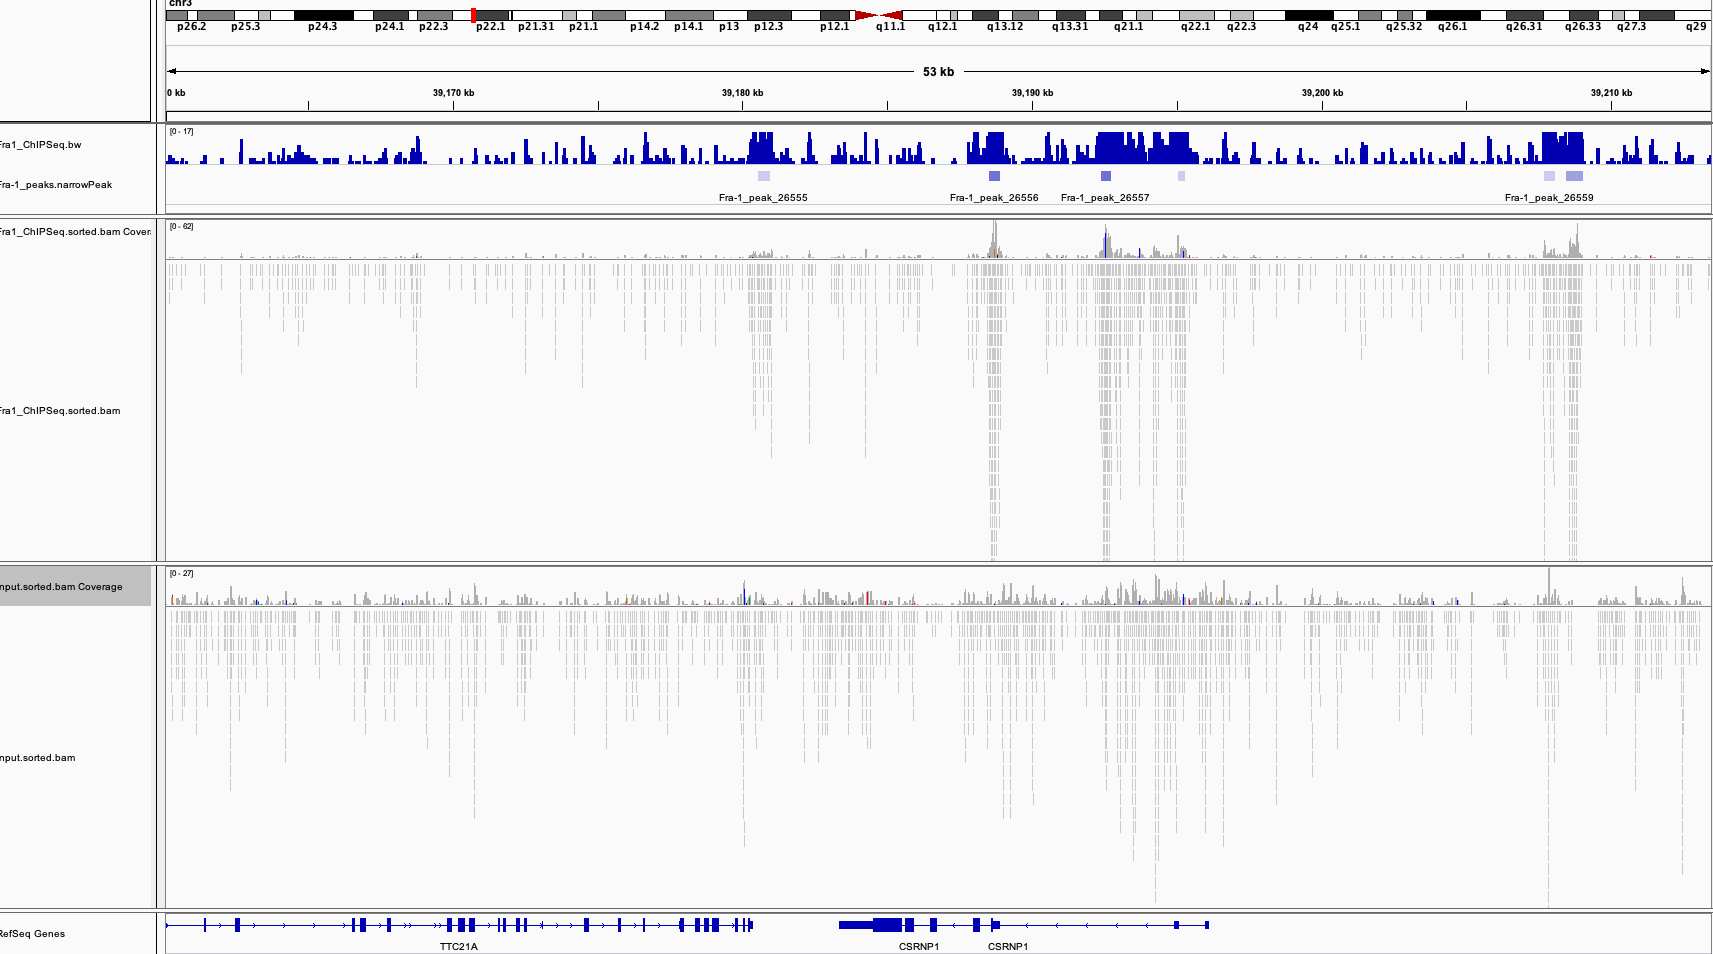

Another target gene which is regulated by Fra-1, not c-Jun as well is UBE2D3 and in IGV looks like this:
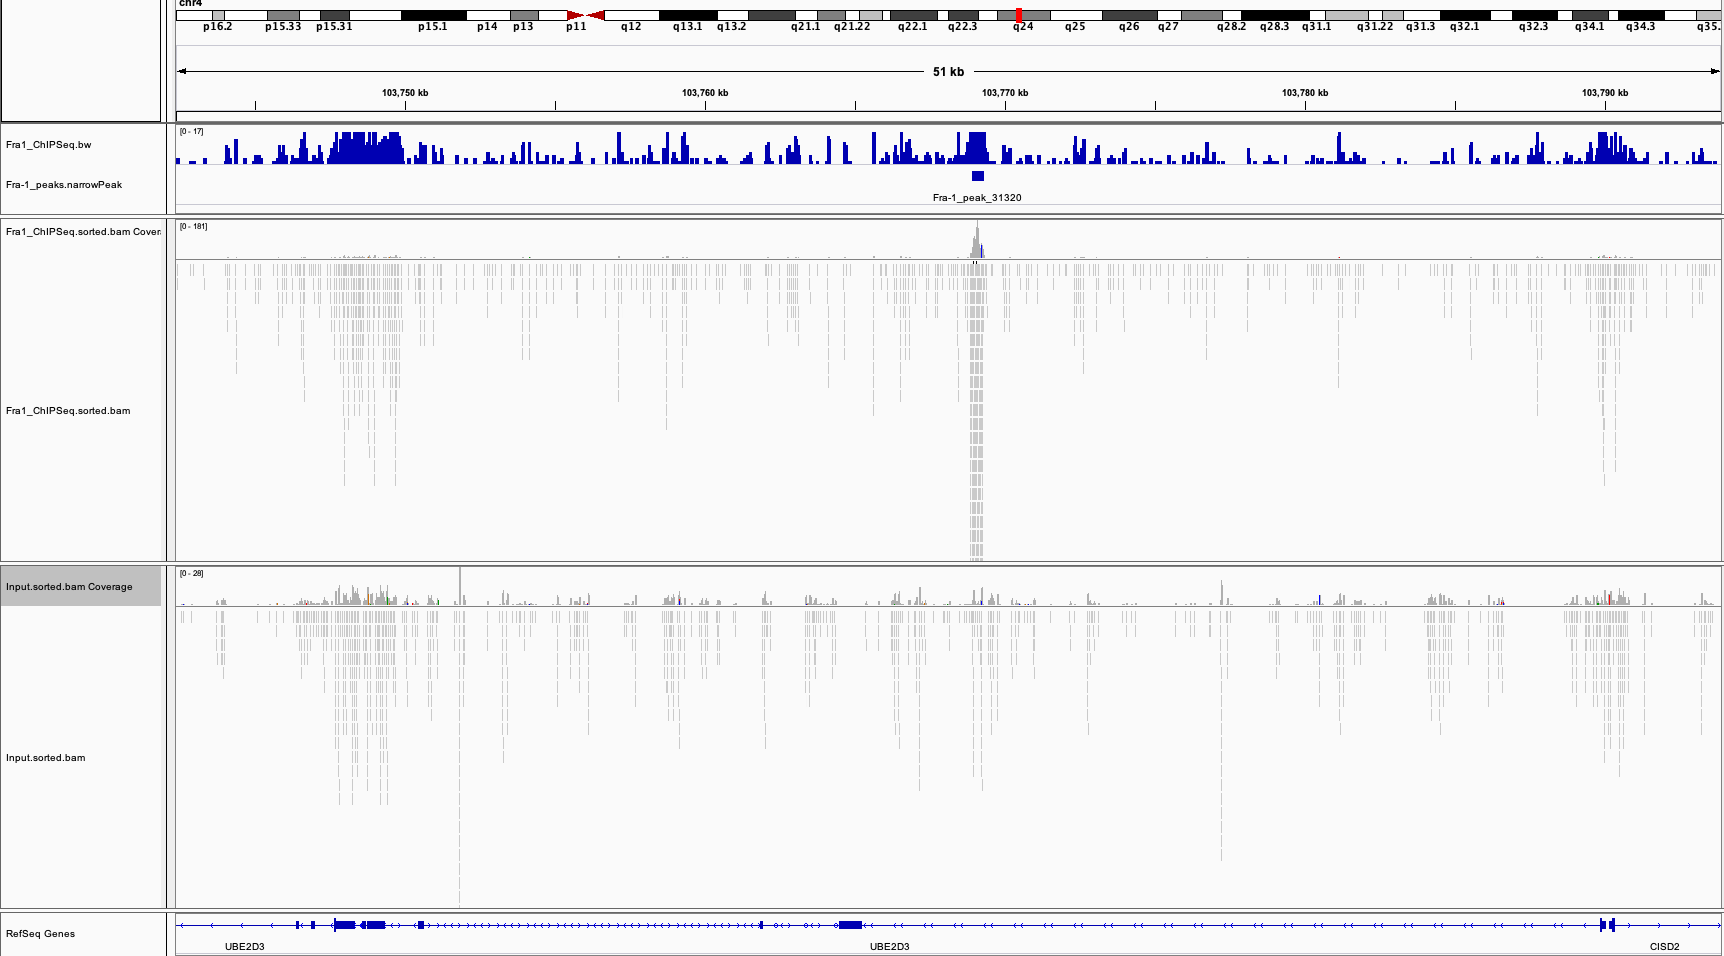

A Heatmap plot was generated to visualize the distribution of data over the call peaks. A matrix will be calculated having on columns the position to the left and right of the peak and as rows the identified peaks. The reference is the call peaks against the bw file. For this we need the bed file.

In [46]:
#creating the bed file with the first 3 cloumns from Fra-1_peaks.narrowPeak
cat Fra-1_peaks.narrowPeak | cut -f 1-3 > Fra_1_peaks.bed

In [51]:
#compute the matrix
computeMatrix reference-point -S Fra1_ChIPSeq.bw -R Fra_1_peaks.bed --referencePoint center -a 2000 -b 2000 --binSize 5 --outFileName Fra_1_peaks.tab.gz

In [53]:
plotHeatmap -m Fra_1_peaks.tab.gz -out Fra-1_peaks5.png --heatmapHeight 15  --refPointLabel peak.center --regionsLabel peaks --plotTitle 'ChIP-seq signal'

There is an important difference between the height of the peaks and at the end of the plot it even looks more even. Maybe the threshold of 0.5 could be higher.
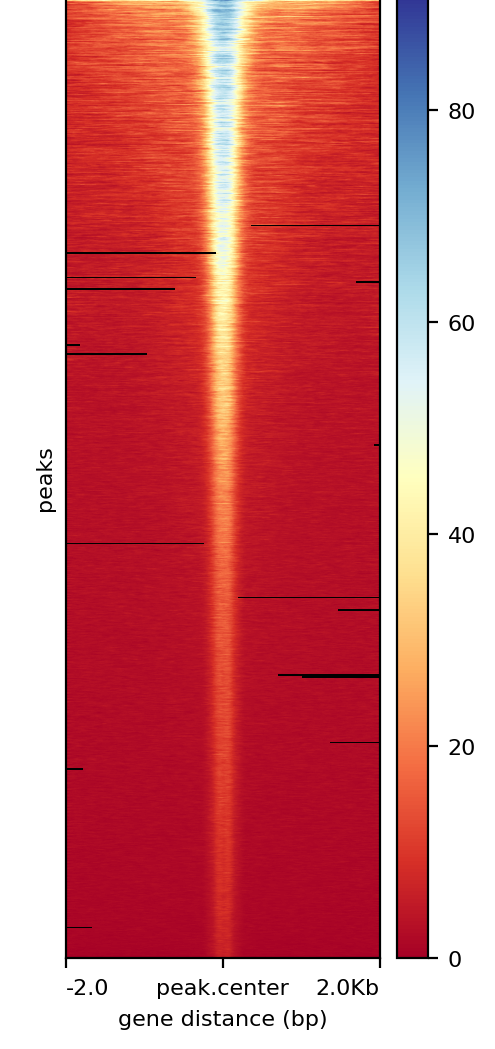

### Motif Analysis
In this section we have two different approaches. First approach is involving the novo motif discovery using RSAT. With this method we are looking for the motif of out target transcription factor Fra-1. The result should suggest that in the collection of peaks generated by MACS2, it is also found Fra-1 motif.
Next approach is to check if the peaks found are enriched for the known PSSMS. This will be done with i-cisTraget tool.

The analisys done with RSTA for de novo motiv discovery showed the following summary statistics on sequence composiition:
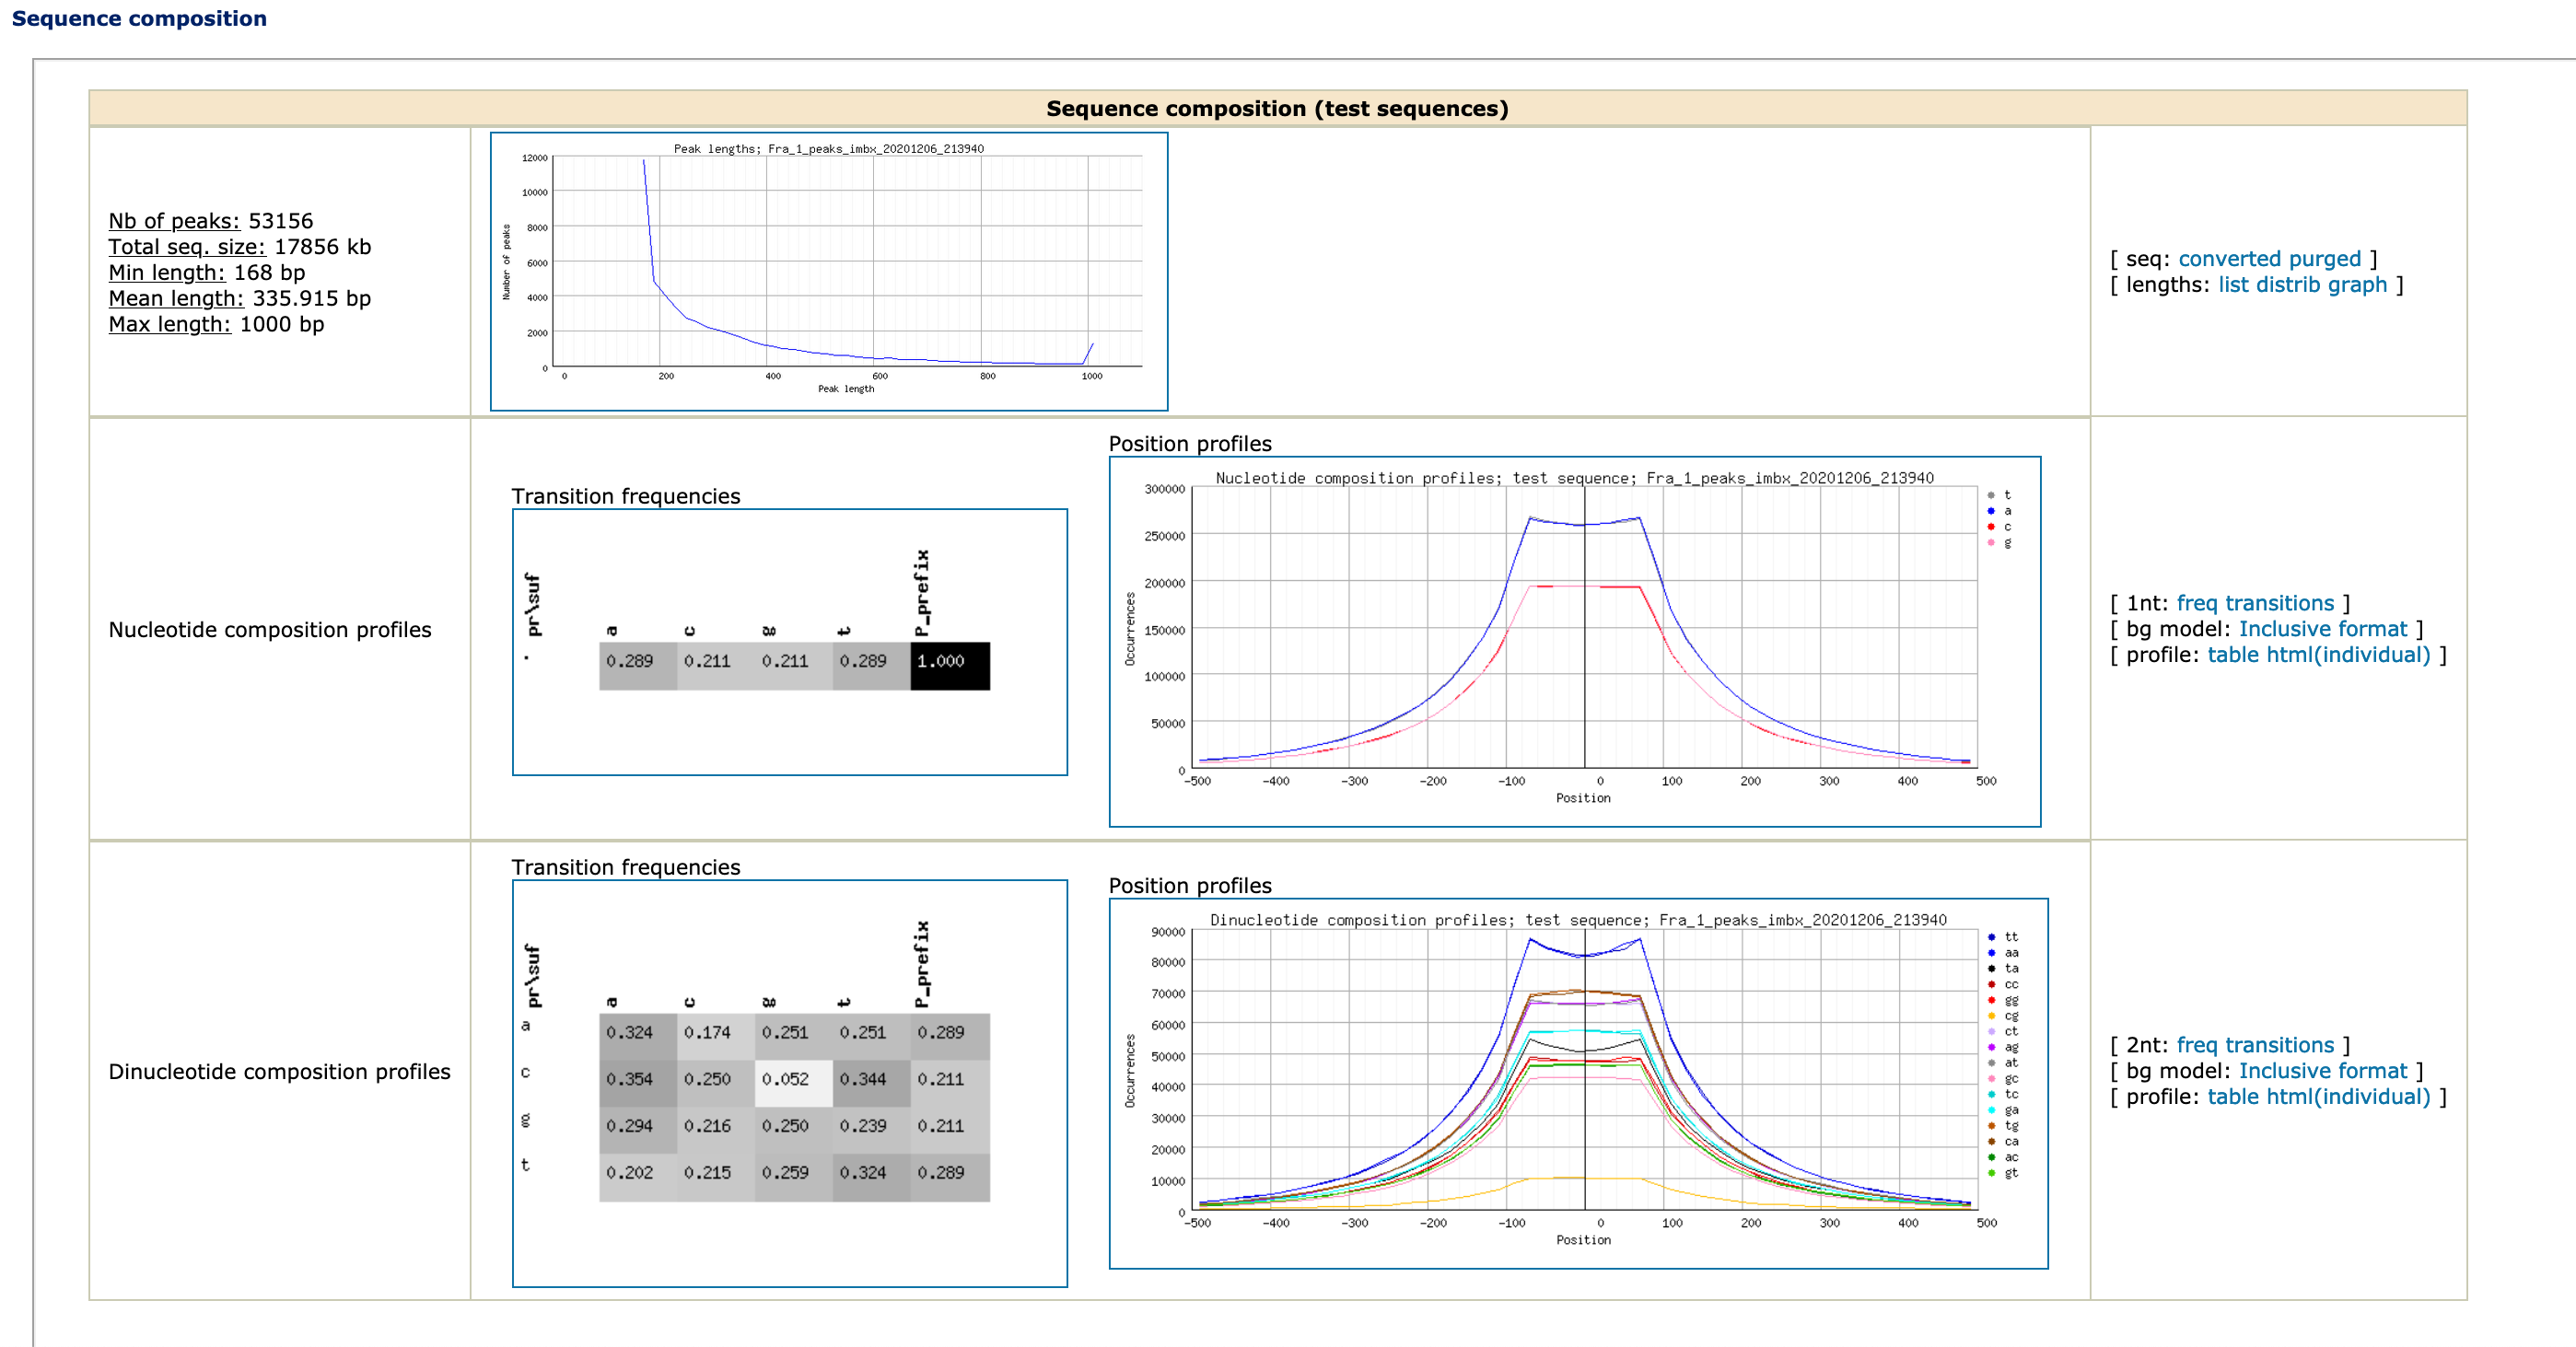

First and second peak identified was the Fra-1 motif: 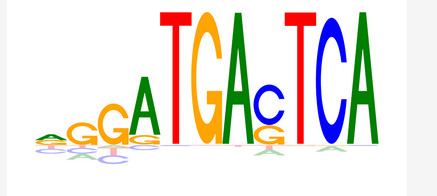

26% of the peaks with predicted site is 26%. The procentage is small because maybe there are to many peaks(q value should have been higher).
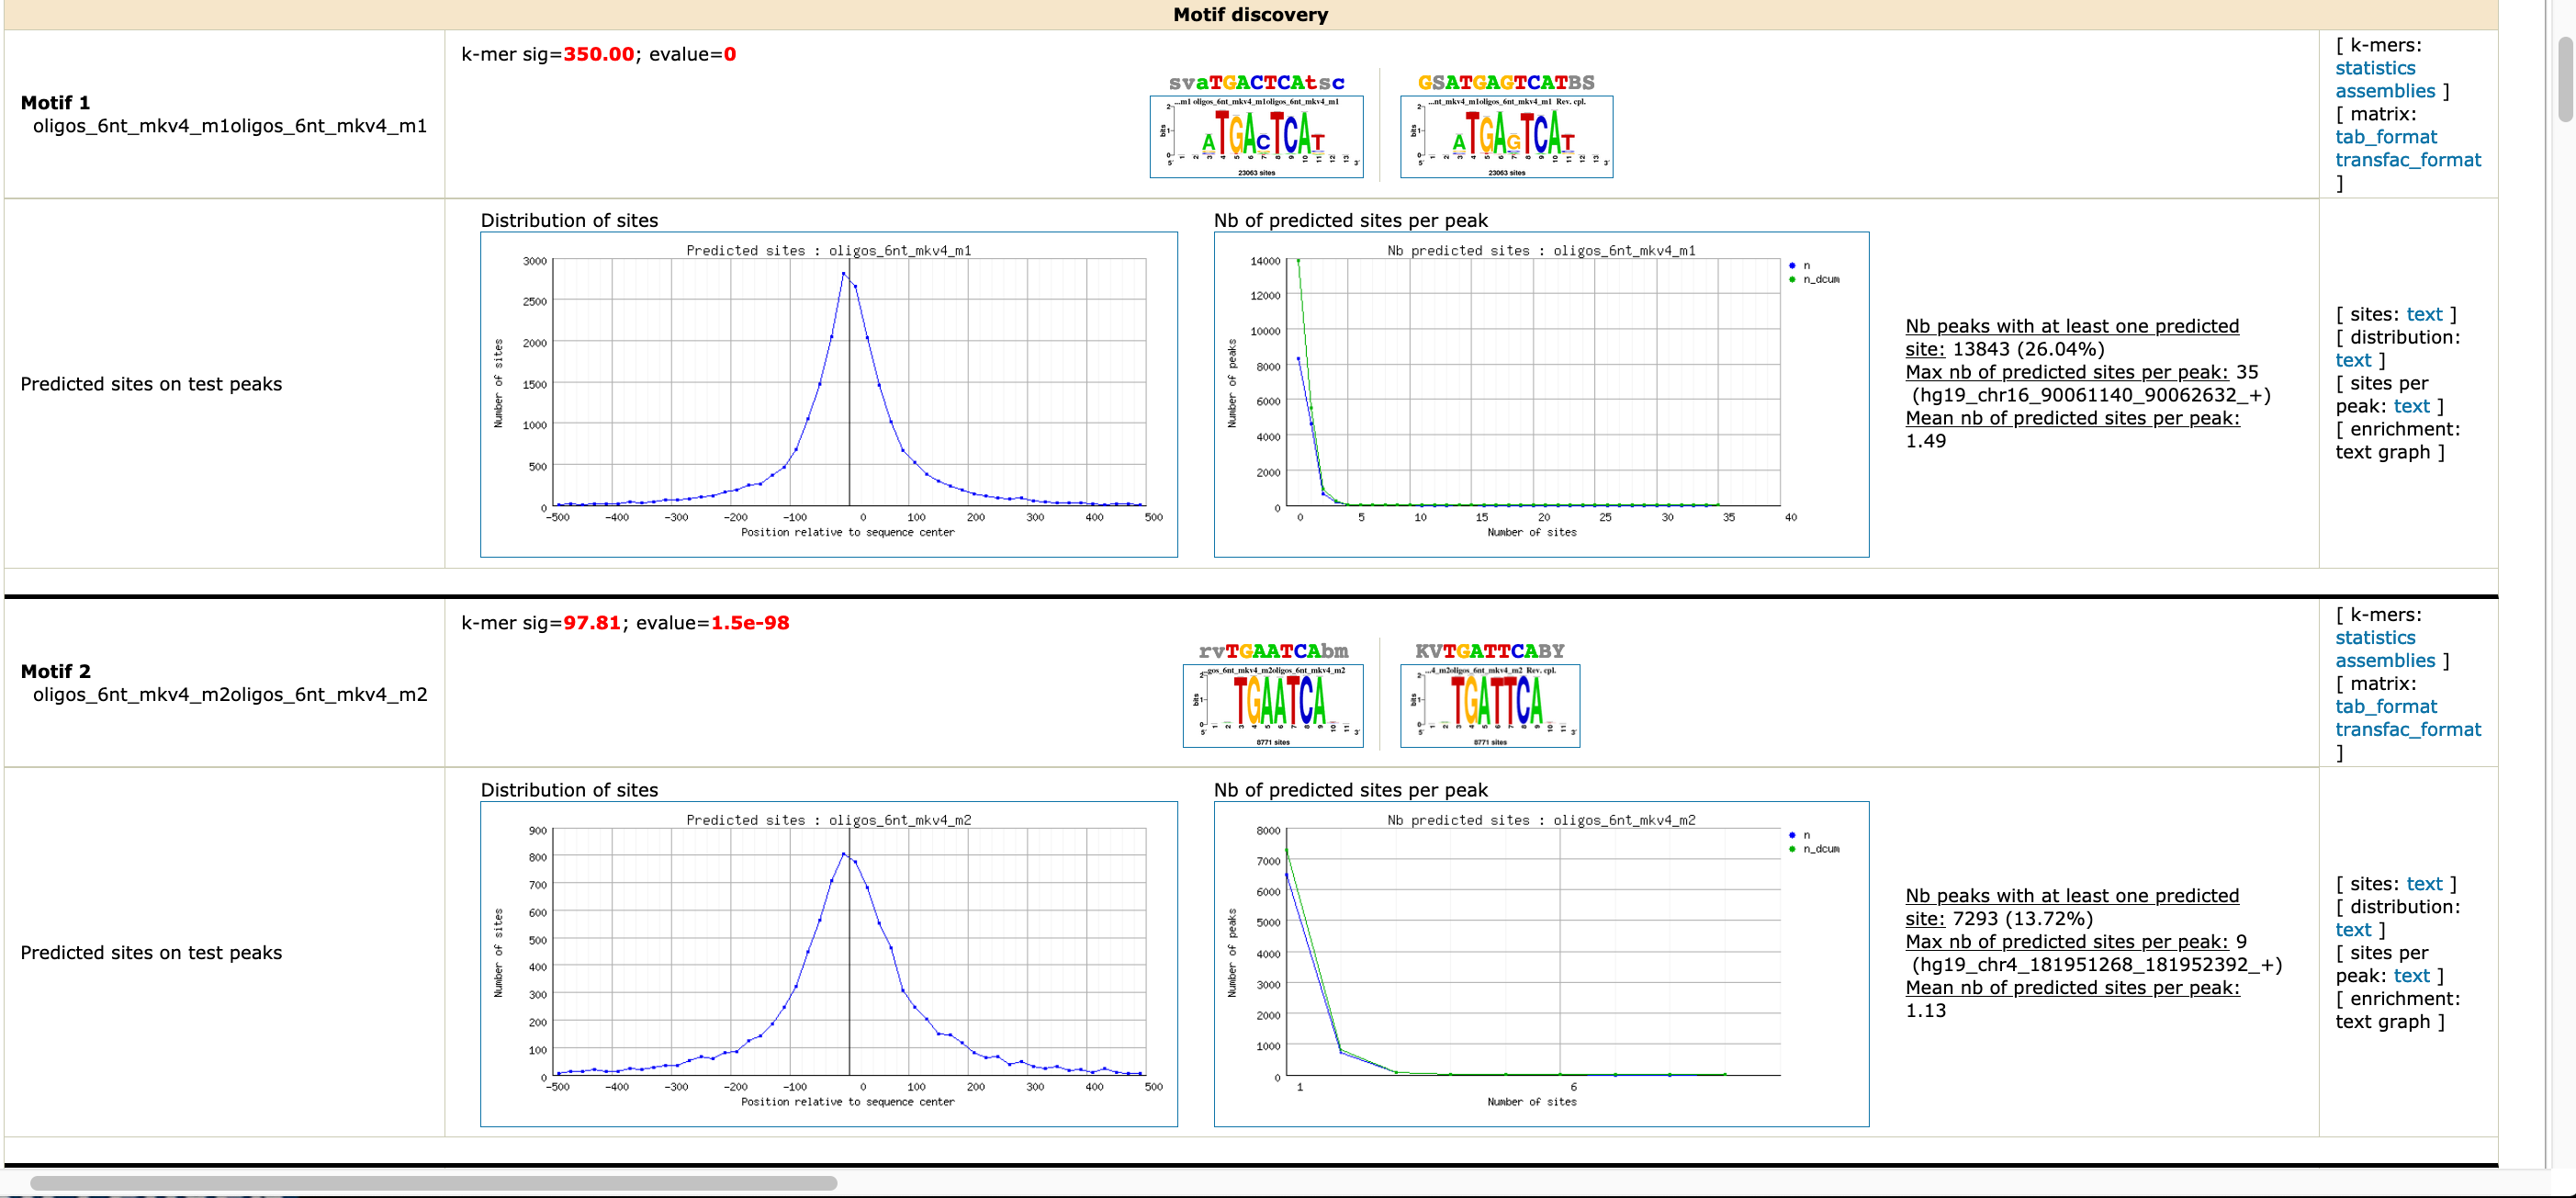

There are 13843 peaks and the number of predicted sites per peak is 1.5. Next step is to get all the peaks that were identifed as containing this motif. To do so, the file given by RSAT "sites" is used.
Link to the analysis: http://rsat.sb-roscoff.fr/tmp/apache/2020/12/06/peak-motifs.2020-12-06.214348_2020-12-06.214348_5xBu3O/peak-motifs_synthesis.html#merged_sites

In [ ]:
wget -O peak-motifs_oligos_6nt_mkv4_m1_sites.tab "http://rsat.sb-roscoff.fr/tmp/apache/2020/12/06/peak-motifs.2020-12-06.214348_2020-12-06.214348_5xBu3O/results/discovered_motifs/oligos_6nt_mkv4_m1/peak-motifs_oligos_6nt_mkv4_m1_sites.tab"

In [38]:
cat peak-motifs_oligos_6nt_mkv4_m1_sites.tab  | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4  > fra1-allpeaks-with-motif-RSAT.bed

Because we are preparing the data for i-cisTarget we need the bed file. The next comand is to remove any rows that do not have intergers on column two.

In [43]:
awk '$2==($2+0)' fra1-allpeaks-with-motif-RSAT.bed > fra1-allpeaks-with-motif-RSAT-int.bed

In [40]:
head fra1-allpeaks-with-motif-RSAT-int.bed

chr1	266951	267218
chr1	424304	424731
chr1	559887	560135
chr1	1253537	1253998
chr1	1617610	1618096
chr1	1617610	1618096
chr1	1617610	1618096
chr1	1672550	1672792
chr1	1672550	1672792
chr1	1694484	1694714


In [44]:
cat fra1-allpeaks-with-motif-RSAT-int.bed | wc -l

20610


The results of i-cisTarget can be found here : https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/reports/dbc3001d1e493d8212f31de963f7a80dd42a8aae/report.html

By looking at the motifs found, we encounter on first position JUNB:FOSB motif and on 12 postion the motif for Fra-1, but actually all these motif are part of AP-1 transcription factor motif and they look the same.

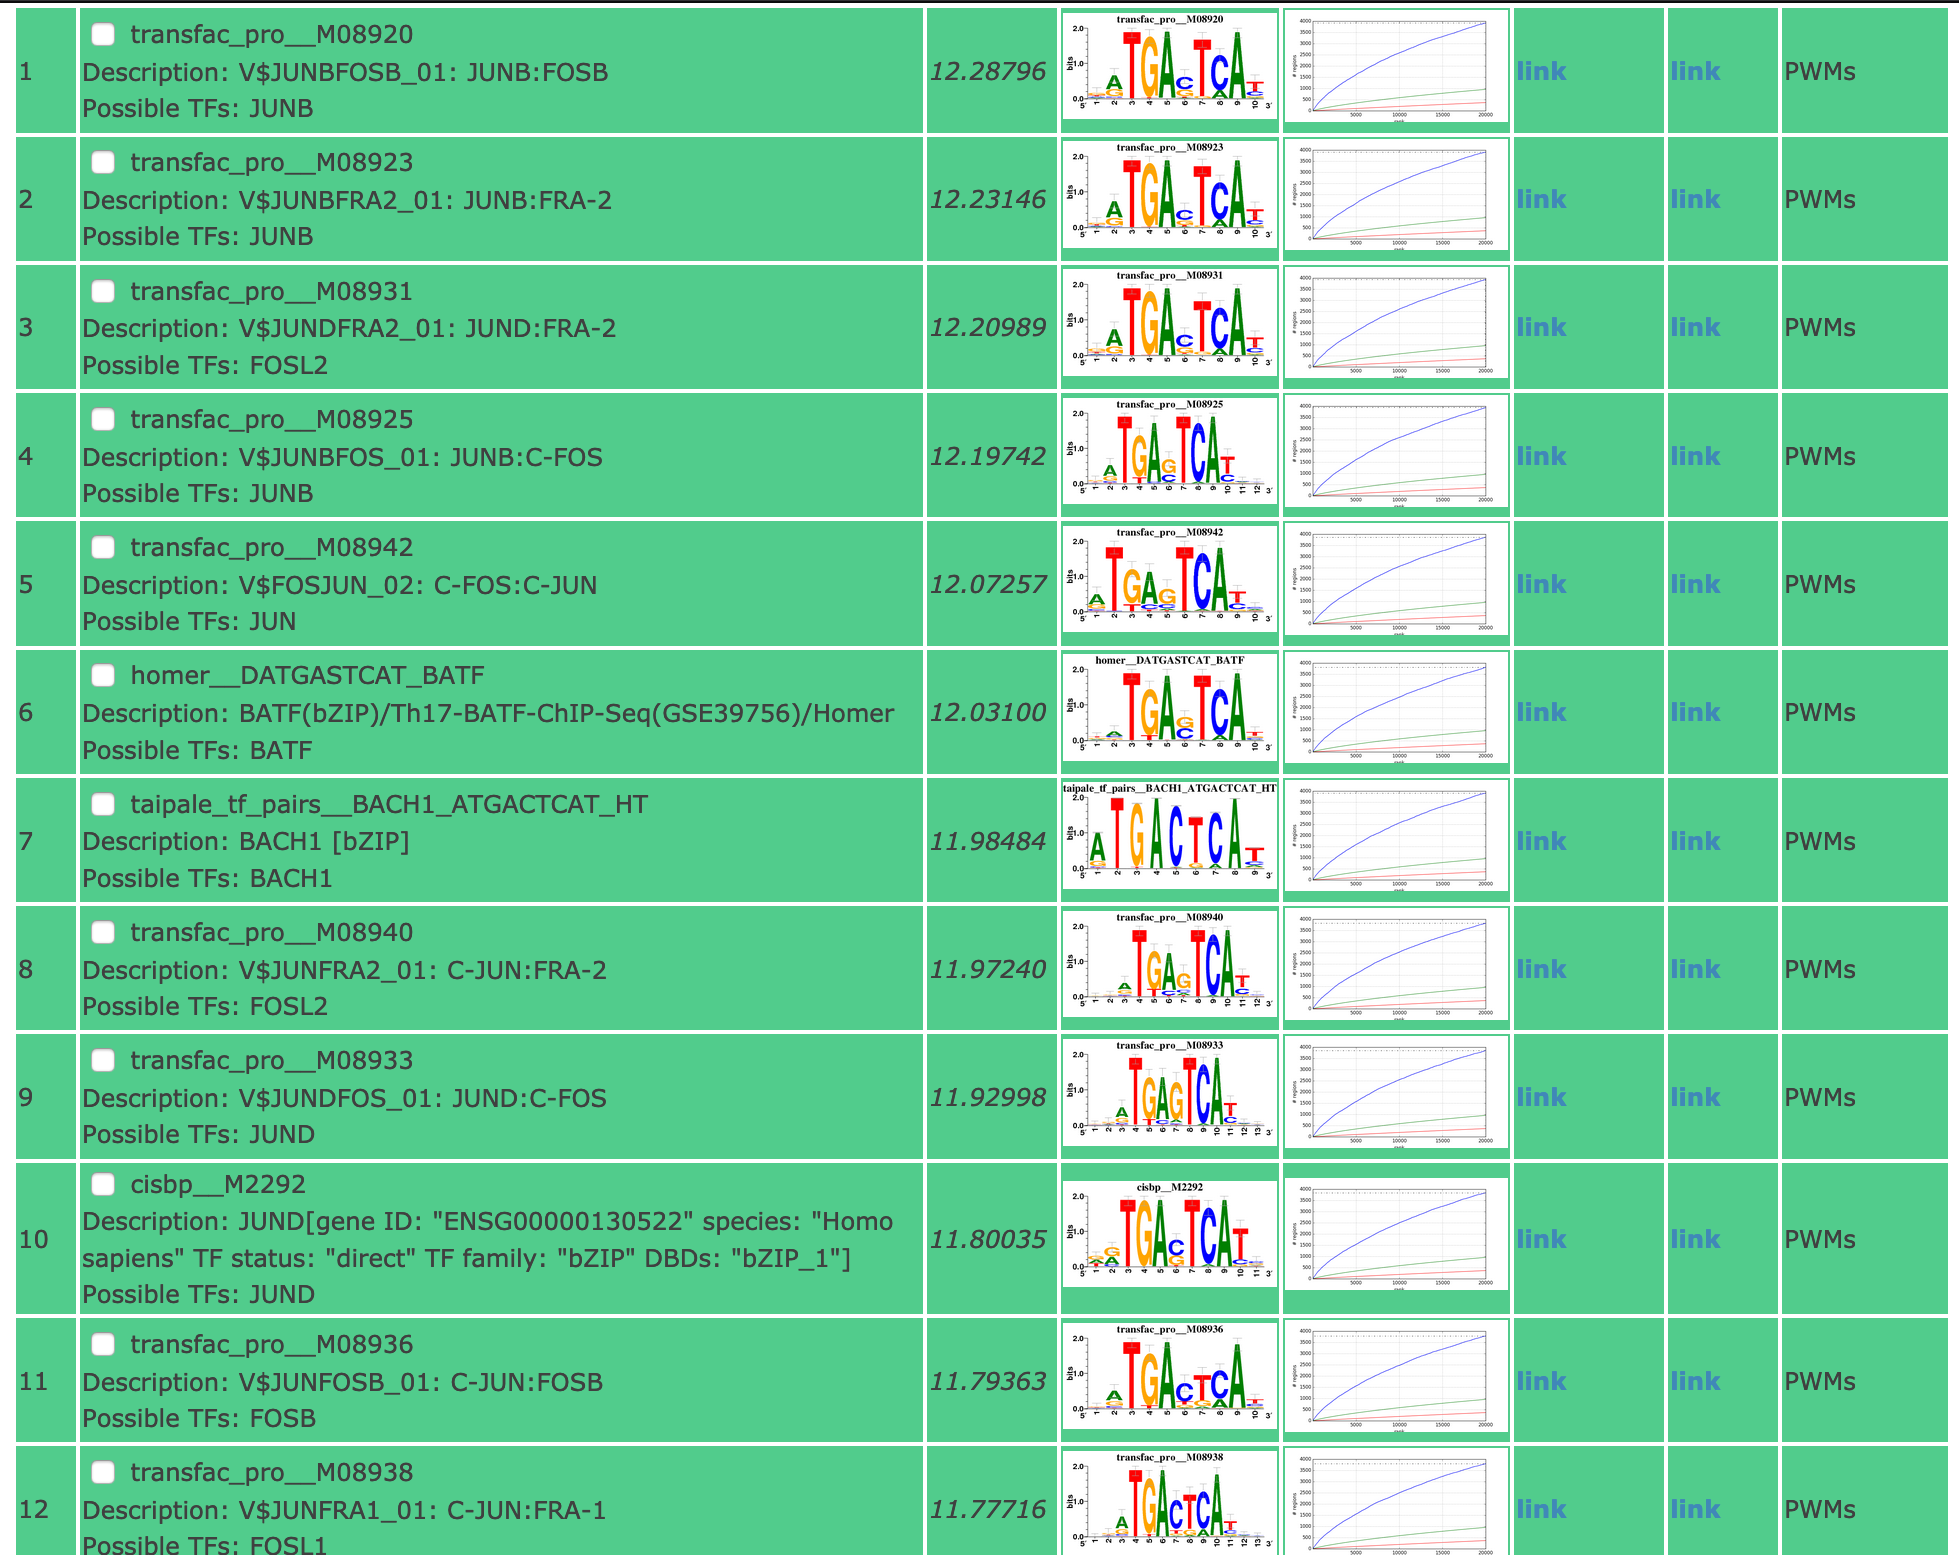

We can also take a look at the recovery plot to how many of out peaks are match with AP-1 motif.

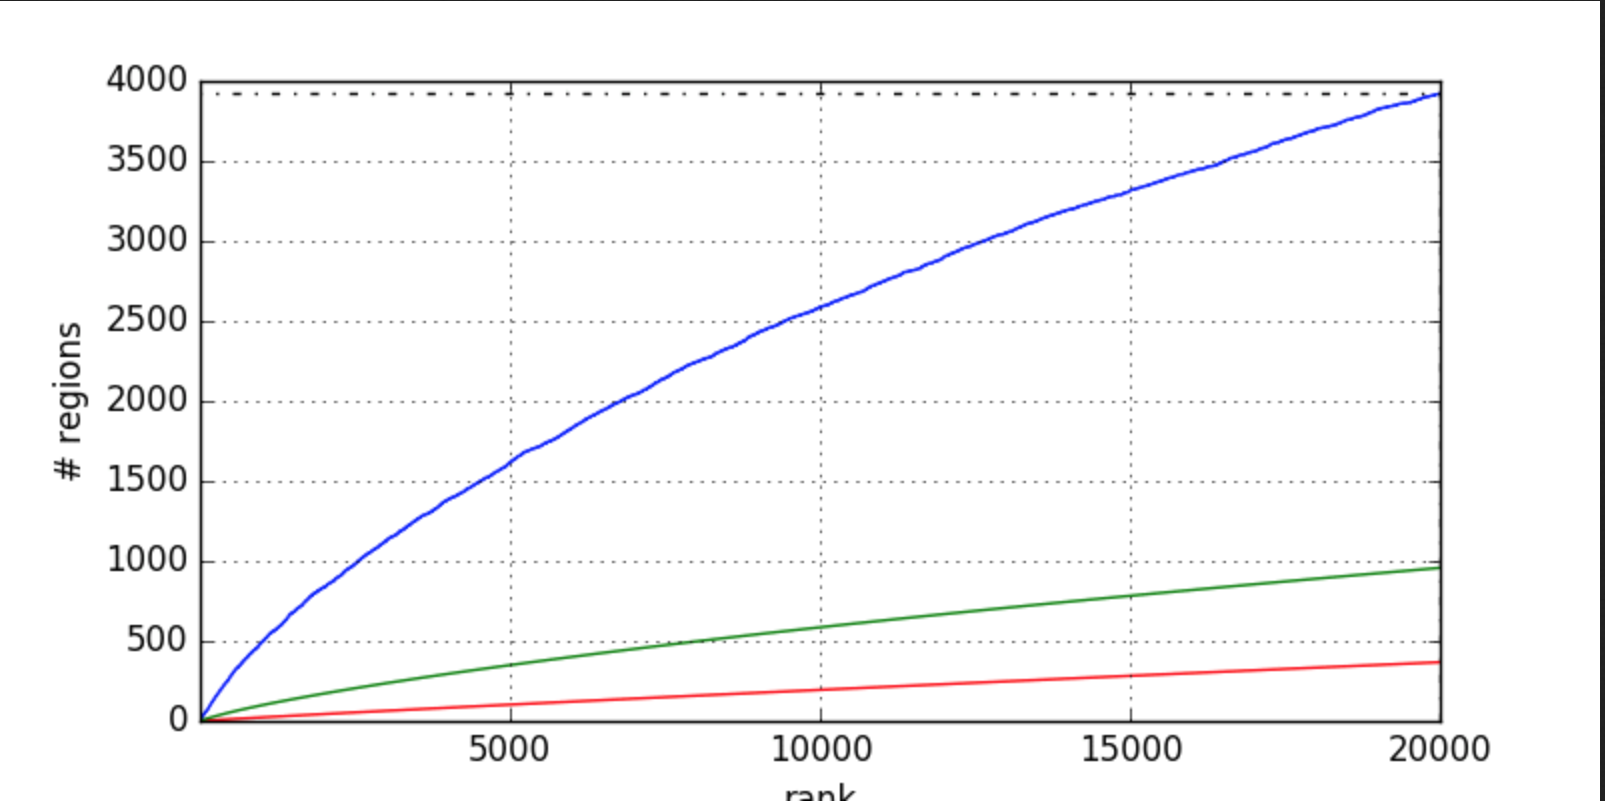

From this plot we can see that these peaks are a good match for AP-1 motif, as we saw in the de novo analysis. We haven't reached the cut-off, so most probably there are more regions in which we can find this motif significantly different than by chance. 

By looking at the candidate target genes we cannot find out positive control gene UBE2D3 at position 2922 in the eature transfac_pro__M08938, but we can find gene CSRNP1, which is also a gene trarget specific for the complex cJun Fra-1. Since we haven't reached the cut-off it is possible that the peak is too far aways and that is way UBE2D3 may not be here.

In [45]:
cat transfac_pro__M08938.targets.bed | wc -l

3802


### Link Peaks to Genes
To link the regions of our peaks to genes we use Great Go web tool. This tool identifies the genes 100 kb apart and does a functional enrichment of the identified genes. From literature it is known that Fra-1, as well as c-Jun have associated as functional categories cytokine-mediated signaling, cell adhesion, immune respone, inflamatory response.
We looked for these functional categories and for new ones as well. The input given is for all the peaks.
The enriched genes near the peak we found can be observed in the following picture:

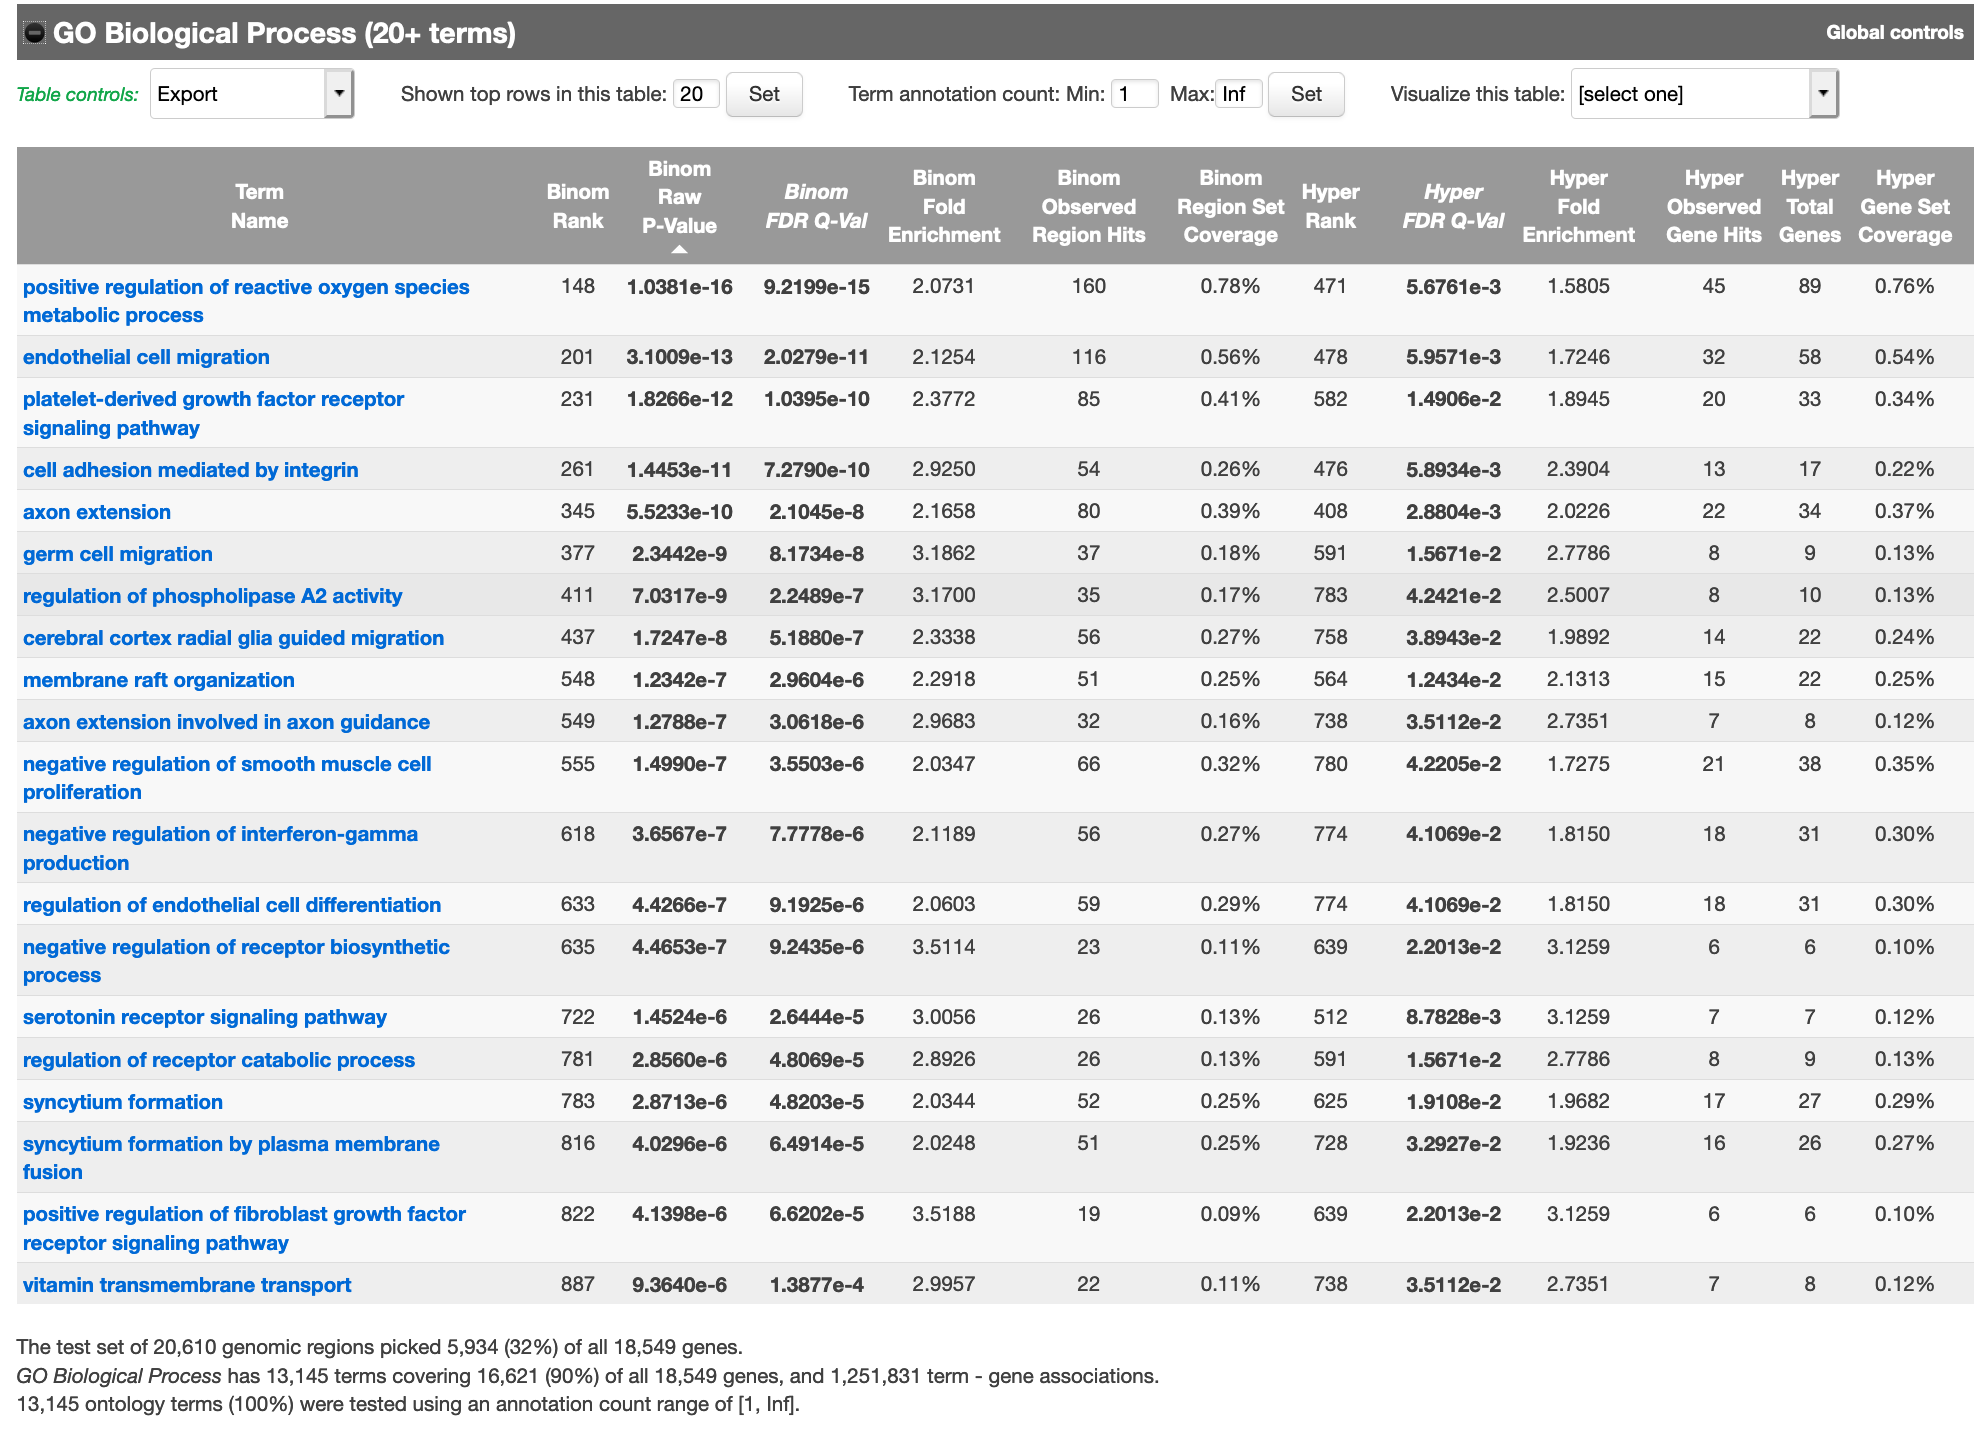

For further analysis I downloaded all the genes for all regions(filename: great-all-region.txt) 

In [48]:
cat great-all-region.txt | cut -f 1 | grep -v '#' | wc -l

20611


In [51]:
#gene target for complex Fra-1 and c-Jung
grep 'CSRNP1' great-all-region.txt

unnamed	GORASP1 (-38867), CSRNP1 (+6345)
unnamed	CSRNP1 (-13675), XIRP1 (+25344)


### Comparison of predicted targets with functional associations to Fra-1

For this comparision I will take a list of genes that are associated with Fra-1 and I will overlap it with the predicted target genes from Great GO. The number of interactors taken from springdb is 500.

In [57]:
cat string_protein_annotations.tsv | cut -f1 | head -10 

#node
AHNAK
AKT1
ATF2
ATF3
ATF4
ATM
AXL
BANF1
BATF3


In [62]:
cat string_protein_annotations.tsv | cut -f 1 | grep -v '#' > fra-1-string-top500.txt

In [74]:
#remove first 2 lines
sed -i '1,2d' great-all-region.txt

In [84]:
#create file with only the gene name column that is different than NONE and I'm taking once each gene
awk '{if($2 != "NONE") print $2}' great-all-region.txt| uniq  > Fra-1-targets-GREAT.txt

In [99]:
cat fra-1-string-top500.txt | wc -l

159


In [86]:
head  Fra-1-targets-GREAT.txt

OR4F29
OR4F16
CPSF3L
CDK11B
CDK11A
SLC35E2
SMIM1
AJAP1
CHD5
PLEKHG5


In [92]:
list=`cat fra-1-string-top500.txt`

In [93]:
for i in $list; do grep -w $i Fra-1-targets-GREAT.txt; done > target_genes.txt

In [98]:
cat target_genes.txt | wc -l
# there are 60 genes that are overlapping with what we got from GREAT Go as enriched genes around our peaks and the 
# genes that interact with Fra-1 as per db-string.

60


In [97]:
grep 'UBE2D3' target_genes.txt
# nothing found for our positive control genes, maybe becuase they were lower in the list. 
# If the string-db would have taken 3000 genes associated with Fra-1, the control gene would have been here.
# we can pick any other genes from the list and see try to confirm their association with Fra-1 and with
# Ap-1 family motif.

: 1

In [100]:
head target_genes.txt

AHNAK
ATF3
BATF3
CD44
CDH1
CDK6
CEBPA
CEBPB
CREBBP
CYR61


With can further investigate this 60 genes, but we could also increase the number of genes found in db-string to confirm our peaks being related with Fra-1.
For this assignemnt I will check a few the genes in target_genes.txt

Gene AHNAK is "Neuroblast differentiation-associated protein AHNAK" it was previoulsy associated with porcesses like blood-brain barrier formation, cell structure and migration, cardiac calcium channel regulation, and tumor metastasis.
Gene ATF3 is "Activating Transcription Factor 3" and it is induced by a variety of signals, including many of those encountered by cancer cells, and is involved in the complex process of cellular stress response.
Gene CD44 is "CD44 antigen" and the protein encoded by this gene is a cell-surface glycoprotein involved in cell-cell interactions, cell adhesion and migration. This protein participates in a wide variety of cellular functions including lymphocyte activation, recirculation and homing, hematopoiesis, and tumor metastasis.

The gene association diseases was done through www.genecards.org
